### 2) Integrar numéricamente

#### Fórmula del trapecio

$ \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right] $

#### Fórmula de Simpson
 
$\frac{h}{3} \left[ f(x_0) + 4 \sum_{\text{impares}} f(x_i) + 2 \sum_{\text{pares}} f(x_i) + f(x_n) \right]$

#### Cuadratura de Gauss-Legendre

$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \sum_{i=1}^{n} w_i f \left( \frac{b - a}{2} x_i + \frac{b + a}{2} \right)$

donde $w_i$ son los pesos de la cuadratura

### Función

$$ \boxed{f(x)=\int \limits_{0}^{3} \frac{e^x sen(x)}{1+x^2} dx}$$

Valor exacto:2.881637273055187
+---------------------+-------------+----------+-------------+
| Método              |   Resultado |    Error | Error (%)   |
+=====================+=============+==========+=============+
| 6 (Trapecio)        |     2.82134 | 0.060293 | 2.092321%   |
+---------------------+-------------+----------+-------------+
| 6 (Simpson)         |     2.8854  | 0.003765 | 0.130641%   |
+---------------------+-------------+----------+-------------+
| 6 (Gauss-Legendre)  |     2.88164 | 6e-06    | 0.000197%   |
+---------------------+-------------+----------+-------------+
| 16 (Trapecio)       |     2.87204 | 0.009592 | 0.332872%   |
+---------------------+-------------+----------+-------------+
| 16 (Simpson)        |     2.88167 | 2.9e-05  | 0.000996%   |
+---------------------+-------------+----------+-------------+
| 16 (Gauss-Legendre) |     2.88164 | 0        | 0.000000%   |
+---------------------+-------------+----------+-------------+
| 20 (Trapecio)       | 

C:\Users\Hp\AppData\Local\Temp\ipykernel_1140\2988595410.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


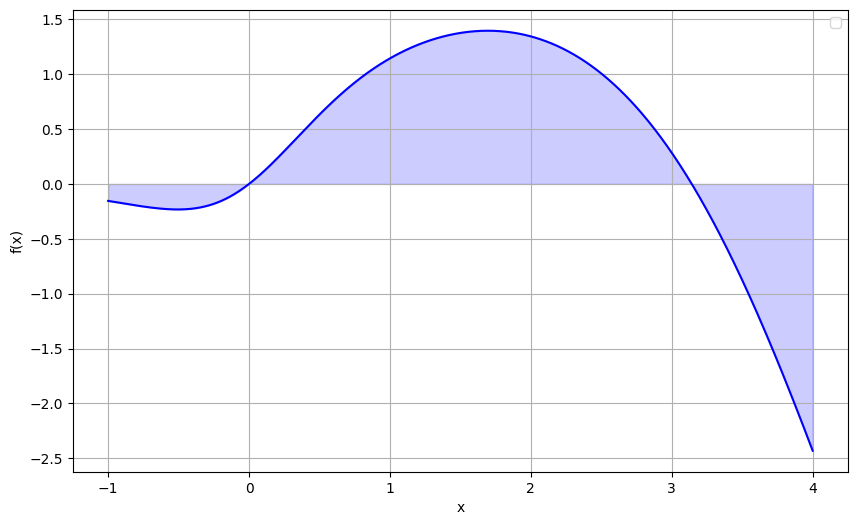

In [2]:
import numpy as np
from scipy.integrate import quad
from tabulate import tabulate
import matplotlib.pyplot as plt


# Parámetros de la integral
a = 0  # Límite inferior
b = 3  # Límite superior
n_values = [6, 15, 20]  # Número de subintervalos

resultados = []

# funcion
f = lambda x: (np.exp(x) * np.sin(x) / (1 + x**2))

# Calcular la integral usando scipy.integrate.quad
valor_exacto, _ = quad(f, a, b)

for n in n_values:
    # Regla del Trapecio
    h = (b - a) / n  # longitud subintervalo
    x = np.linspace(a, b, n+1)  # Genera 'n+1' puntos equiespaciados entre 'a' y 'b'
    y = f(x) 

    int_trapecio = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    error_trapecio = abs(int_trapecio - valor_exacto)
    percent_error_trapecio = (error_trapecio / valor_exacto) * 100

    # Regla de Simpson
    if n % 2 == 1:  # Simpson requiere un número par de intervalos; ajusta 'n' si es impar
        n += 1
    h = (b - a) / n  # longitud subintervalo 
    x = np.linspace(a, b, n+1)  # Genera los nuevos puntos 'x' si 'n' cambió
    y = f(x)  

    int_simpson = (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])
    error_simpson = abs(int_simpson - valor_exacto)
    percent_error_simpson = (error_simpson / valor_exacto) * 100

    # 3. Cuadratura de Gauss-Legendre
    # Genera los puntos y pesos para la cuadratura de Gauss-Legendre usando exactamente 'n' puntos
    puntos, pesos = np.polynomial.legendre.leggauss(n)
    # Escalar los puntos y pesos para el intervalo [a, b]
    puntos = 0.5 * (puntos * (b - a) + (b + a))
    pesos = 0.5 * pesos * (b - a)
    # Calcula la integral sumando f(puntos) * pesos
    integral_gauss_legendre = np.sum(pesos * f(puntos))
    error_gauss_legendre = abs(integral_gauss_legendre - valor_exacto)
    percent_error_gauss_legendre = (error_gauss_legendre / valor_exacto) * 100


   # Añadir los resultados a la lista
    resultados.append([
        f"{n} (Trapecio)", f"{int_trapecio:.6f}", f"{error_trapecio:.6f}", f"{percent_error_trapecio:.6f}%"
    ])
    resultados.append([
        f"{n} (Simpson)", f"{int_simpson:.6f}", f"{error_simpson:.6f}", f"{percent_error_simpson:.6f}%"
    ])
    resultados.append([
        f"{n} (Gauss-Legendre)", f"{integral_gauss_legendre:.6f}", f"{error_gauss_legendre:.6f}", f"{percent_error_gauss_legendre:.6f}%"
    ])

# Crear una tabla con los resultados
tabla = [
    ["Método", "Resultado", "Error", "Error (%)"]
] + resultados

# Imprimir la tabla
print(f"Valor exacto:{valor_exacto}")
print(tabulate(tabla, headers="firstrow", tablefmt="grid"))
# Graficar la integral exacta
x = np.linspace(a - 1, b + 1, 1000)  # Ampliar el rango para una mejor visualización
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
plt.fill_between(x, y, alpha=0.2, color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()